In [1]:
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt

In [2]:
nome_arquivo_csv = 'dataset.csv'
dados = pd.read_csv(nome_arquivo_csv)


# 1.Descrição de projeto:


## 1.1 Contexto de algumas variáveis:


# 2. Pré-processamento

## 2.1 Leitura dos dados

In [3]:
display(dados)

,encounter_id,patient_id,hospital_id,age,bmi,elective_surgery,ethnicity,gender,height,icu_admit_source,...,diabetes_mellitus,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,apache_3j_bodysystem,apache_2_bodysystem,Unnamed: 83,hospital_death
0,66154,25312,118,68.0,22.730000,0,Caucasian,M,180.3,Floor,...,1.0,0.0,0.0,0.0,0.0,0.0,Sepsis,Cardiovascular,NaN,0
1,114252,59342,81,77.0,27.420000,0,Caucasian,F,160.0,Floor,...,1.0,0.0,0.0,0.0,0.0,0.0,Respiratory,Respiratory,NaN,0
2,119783,50777,118,25.0,31.950000,0,Caucasian,F,172.7,Accident & Emergency,...,0.0,0.0,0.0,0.0,0.0,0.0,Metabolic,Metabolic,NaN,0
3,79267,46918,118,81.0,22.640000,1,Caucasian,F,165.1,Operating Room / Recovery,...,0.0,0.0,0.0,0.0,0.0,0.0,Cardiovascular,Cardiovascular,NaN,0
4,92056,34377,33,19.0,NaN,0,Caucasian,M,188.0,Accident & Emergency,...,0.0,0.0,0.0,0.0,0.0,0.0,Trauma,Trauma,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91708,91592,78108,30,75.0,23.060250,0,Caucasian,M,177.8,Floor,...,1.0,0.0,0.0,0.0,0.0,1.0,Sepsis,Cardiovascular,NaN,0
91709,66119,13486,121,56.0,47.179671,0,Caucasian,F,183.0,Floor,...,0.0,0.0,0.0,0.0,0.0,0.0,Sepsis,Cardiovascular,NaN,0
91710,8981,58179,195,48.0,27.236914,0,Caucasian,M,170.2,Accident & Emergency,...,1.0,0.0,0.0,0.0,0.0,0.0,Metabolic,Metabolic,NaN,0
91711,33776,120598,66,NaN,23.297481,0,Caucasian,F,154.9,Accident & Emergency,...,0.0,0.0,0.0,0.0,0.0,0.0,Respiratory,Respiratory,NaN,0


## 2.2 Analise Descritiva:


### 2.2.1 Entendendo os conceitos

Aqui entendermis melhor as variaveis de maior interesse e como elas se relacionam. Elas serão __gender__, __hospital_death__, __bmi__, e __age__ __ethnicity__ cada uma dessas variáveis relacionam-se com as outras e apartir delas podemos contruir novos dados que darão este relacionamento.
__leukemia__:

__diabetes_mellitus__:

__solid_tumor_with_metastasis__:

__gender__: representa o gênero da pessoa que deu entrada no hospital.

__hospital_death__: representa se a pessoa que deu entrada veio a óbito.

__ethnicity__: representa a etnia da pessoa,ou seja,de onde ela veio.

Todas essas variáveis são qualitativas nominais.

__bmi__: representa o indice de massa corporeo da pessoa. 

__age__: representa a idade da pessoa.

Já essas outras duas variáveis são qualitativas sendo que __bmi__ é qualitativa continua e __age__ é qualitativa discreta.




### 2.2.2 Funções

Aqui estarão asfunções de associção entre variaveis qualitativas e quantitativas usadas para descrever e entender relações das variáveis por meio de gráficos e tabelas.

In [36]:
def grafico_qualitativa(var,dataframe):
     dados_qualitativa = dataframe[var].value_counts(normalize = True).reset_index(name='Frequência').rename(columns={'index':var})
     display(dados_qualitativa)
     plt.figure(figsize=(10, 3))
     dados_grafico = dataframe[var].value_counts()
     dados_grafico.plot(kind='bar')
     plt.xlabel('Valores')
     plt.ylabel('Frequência')
     plt.title(f'Gráfico da Frequência:{var}')
     plt.show() 

In [6]:
def qualitativaXquantativa(varName1,varName2,dataframe):
    title = varName1 + " per " + varName2
    print("******** " + title + " ********")
    display(dataframe[[varName1, varName2]].groupby(varName2).describe())
    boxVarS = dataframe.boxplot(column=varName1,figsize=(10,6),vert=False, by=varName2);
    boxVarS.set_ylabel(varName1,fontsize=12);
    boxVarS.set_xlabel(varName2,fontsize=12);

In [24]:
def QualiQualiAssociation(varName1, varName2,dataframe):
    SQ_tb = pd.crosstab(index = dataframe[varName1],columns = dataframe[varName2], normalize = "index")#, margins = True
    title = "Conditional Proportion: " + varName2  + " per " +  varName1 
    print("******** " + title + " ********")
    display(SQ_tb)
    image = SQ_tb.plot(kind="bar", figsize=(10,6), stacked=False,title=title,fontsize=12)
    image.set_ylabel("%",fontsize=12)
    image.set_xlabel(varName1,fontsize=12)

In [23]:
def DeathsBy(varName,dataframe):
    plt.figure(figsize=(8, 6))
    sn.barplot(dataframe,x = varName,y = 'hospital_death')
    plt.xlabel(varName)
    plt.ylabel('Count')
    plt.title(f'Morte das pessoas por{varName}')

### 2.2.3 Frequências das qualitativas

#### 2.2.3.1 Distribuição das frequências para as variáveis escolhidas

,gender,Frequência
0,M,0.539536
1,F,0.460464


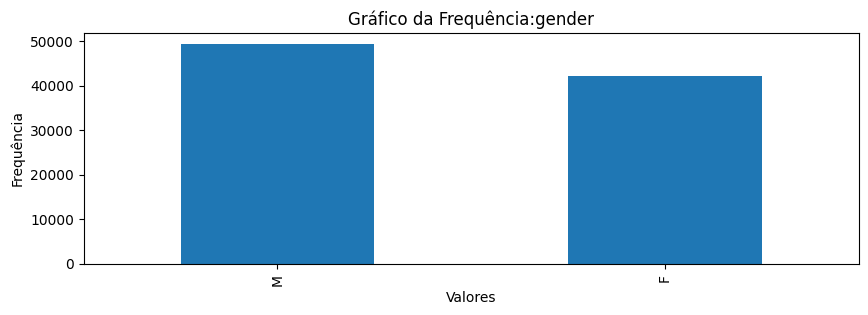

In [37]:
grafico_qualitativa("gender", dados)

,leukemia,Frequência
0,0.0,0.992934
1,1.0,0.007066


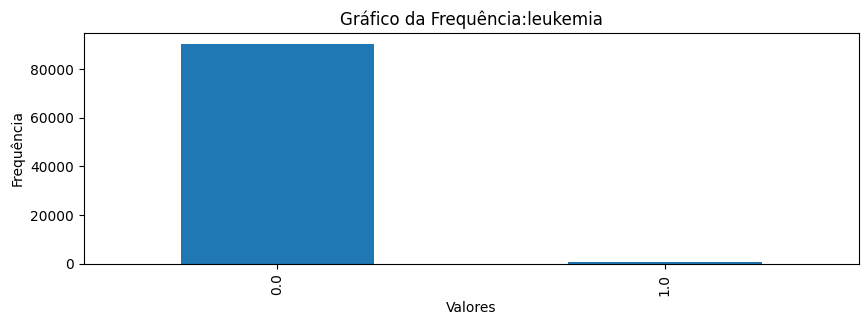

In [39]:
grafico_qualitativa("leukemia",dados)

,diabetes_mellitus,Frequência
0,0.0,0.774808
1,1.0,0.225192


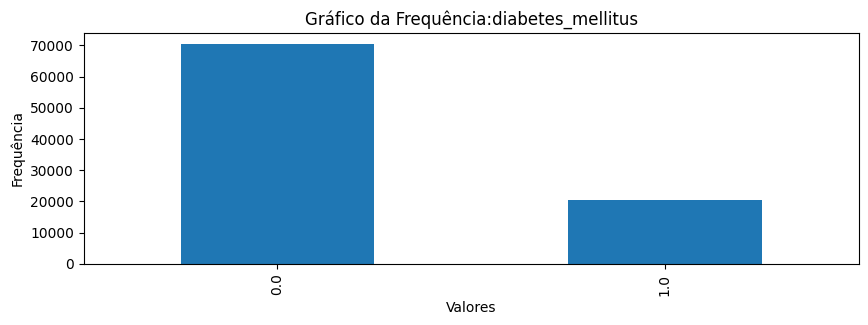

In [40]:
grafico_qualitativa("diabetes_mellitus",dados)

,solid_tumor_with_metastasis,Frequência
0,0.0,0.979362
1,1.0,0.020638


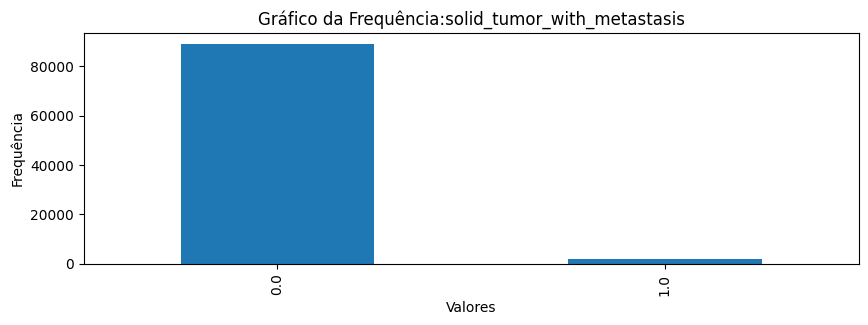

In [41]:
grafico_qualitativa("solid_tumor_with_metastasis",dados)

,ethnicity,Frequência
0,Caucasian,0.782613
1,African American,0.105704
2,Other/Unknown,0.048429
3,Hispanic,0.042029
4,Asian,0.012500
5,Native American,0.008725


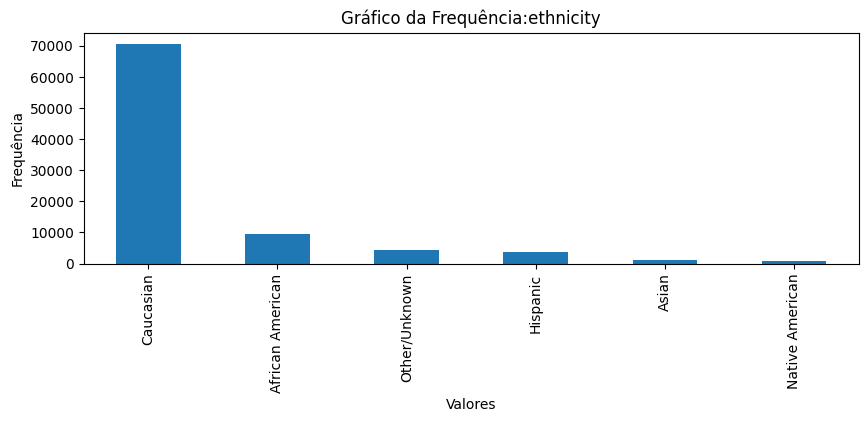

In [42]:
grafico_qualitativa("ethnicity",dados)

,hospital_death,Frequência
0,0,0.913698
1,1,0.086302


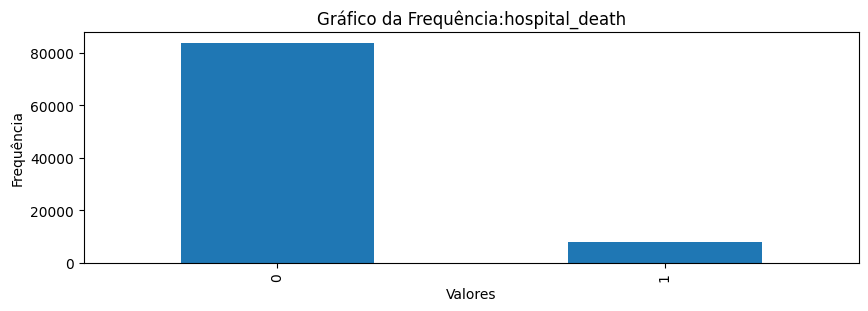

In [43]:
grafico_qualitativa("hospital_death",dados)

#### 2.2.3.1 Relação das frequências de mortes no hospital por variáveis escolhidas

In [ ]:
QualiQualiAssociation("gender","hospital_death",dados)

In [ ]:
QualiQualiAssociation("leukemia","hospital_death",dados)

In [ ]:
QualiQualiAssociation("diabetes_mellitus","hospital_death",dados)

******** Conditional Proportion: hospital_death per solid_tumor_with_metastasis ********


hospital_death,0,1
solid_tumor_with_metastasis,,
0.0,0.916035,0.083965
1.0,0.815229,0.184771


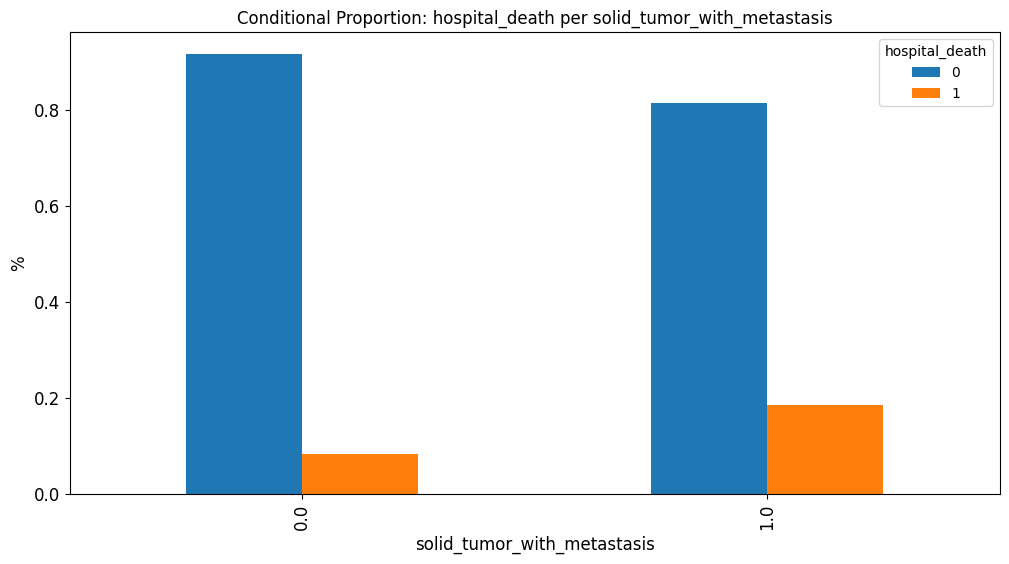

In [45]:
QualiQualiAssociation("solid_tumor_with_metastasis","hospital_death",dados)

### 2.2.4 Graficos das quantitativas

******** bmi per gender ********


bmi                                                        \
          count       mean       std        min        25%        50%   
gender                                                                  
F       40634.0  29.563163  9.065927  14.844926  23.219955  27.801078   
M       47632.0  28.863637  7.521182  14.844926  23.956698  27.555611   

                             
              75%       max  
gender                       
F       33.932872  67.81499  
M       32.233738  67.81499

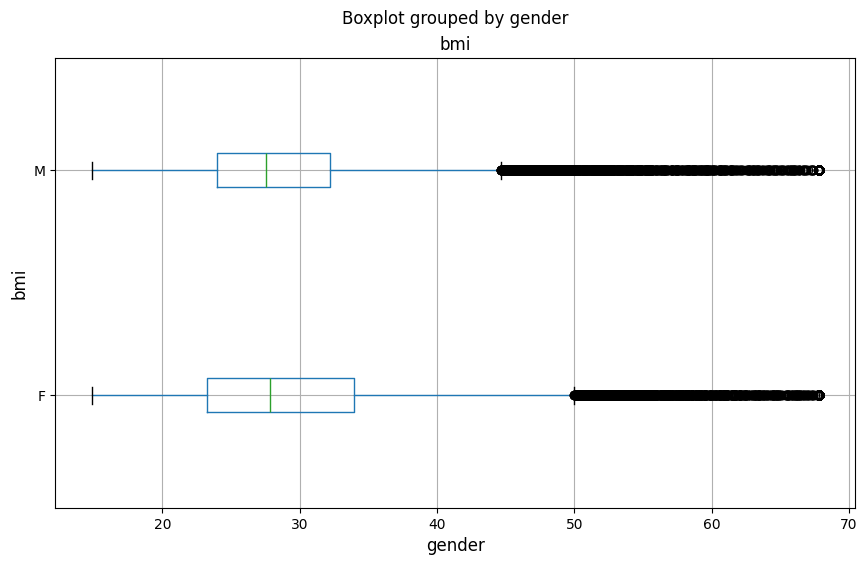

In [10]:
qualitativaXquantativa("bmi","gender",dados)

******** Conditional Proportion: hospital_death per lymphoma ********


hospital_death,0,1
lymphoma,,
0.0,0.914292,0.085708
1.0,0.832447,0.167553


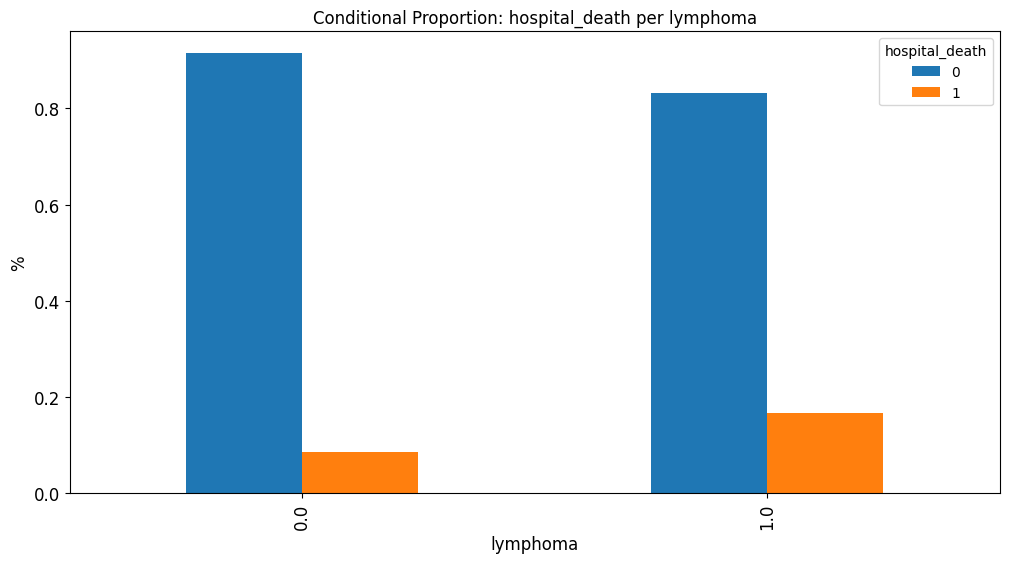

In [27]:
QualiQualiAssociation("lymphoma","hospital_death",dados)